In [11]:
#Part 1 - Constrained Optimisation
#Gabriela Sewdhan - 813001696
#Emilo Gopaul - 816007034

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

In [14]:
# Rosenbrock function constrained to a disk https://en.wikipedia.org/wiki/Test_functions_for_optimization
 
def fitness(state):
    
    x = state[0]
    y = state[1]
    
    a = 1. - x
    a *= a
    
    b = y - x*x
    b *= b
    b = 100.*b
    
    #Penalty
    c = (np.maximum(0, x*x + y*y - 2.))**2
    
    #Negative, as PSO is used to find the maximum, but we want to find the minimum
    return -a - b - c

In [15]:
n = 2
num_particles = 1000
num_iterations = 100
inertia_factor = 0.5
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [16]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [17]:
for i in range(num_iterations):
    for p in particles:
        fitness_of_p = p.compute_fitness(fitness)
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [18]:
 # Print Statements to show the best state and best score
 print("Global Best State: ", global_best.state)

Global Best State:  [1. 1.]


In [19]:
#Should be close to zero
print("Global Best Score: ", global_best.best_score)

Global Best Score:  -2.0914201445454895e-21


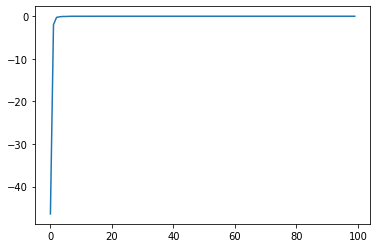

In [20]:
#Plotting the convergence curve
plot(list(range(len(convergence_curve))), convergence_curve)